In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve
from sklearn import metrics


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
#import catboost as ctb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



import matplotlib.pylab as plt
%matplotlib inline
# hide warning message
import warnings
warnings.filterwarnings("ignore")


In [2]:
raw = pd.read_excel('loans50k.xlsx')

In [3]:
raw.shape

(50000, 32)

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       50000 non-null  int64  
 1   amount       49999 non-null  float64
 2   term         49999 non-null  object 
 3   rate         49999 non-null  float64
 4   payment      49999 non-null  float64
 5   grade        49999 non-null  object 
 6   employment   47215 non-null  object 
 7   length       47319 non-null  object 
 8   home         49999 non-null  object 
 9   income       49999 non-null  float64
 10  verified     49999 non-null  object 
 11  status       49999 non-null  object 
 12  reason       49999 non-null  object 
 13  state        49999 non-null  object 
 14  debtIncRat   49999 non-null  float64
 15  delinq2yr    49999 non-null  float64
 16  inq6mth      49999 non-null  float64
 17  openAcc      49999 non-null  float64
 18  pubRec       49999 non-null  float64
 19  revo

In [5]:
temp_null=raw.isnull().sum()
total=raw.isnull().count()
percent=temp_null/total
missing_data=pd.concat([temp_null,percent],axis=1,keys=['temp_null','percent'])
missing_data

,temp_null,percent
loanID,0,0.00000
amount,1,0.00002
term,1,0.00002
rate,1,0.00002
payment,1,0.00002
grade,1,0.00002
employment,2785,0.05570
length,2681,0.05362
home,1,0.00002
income,1,0.00002


In [6]:
# since the total missing data is around 5% mainly on empoyment type and length, replace the missing data by unknown.
raw['employment'] = raw['employment'].fillna('unknown_employment')
raw['length'] = raw['length'].fillna('unknown_length')

# drop other missing data
raw = raw.dropna()
raw.head()

,loanID,amount,term,rate,payment,grade,employment,length,home,income,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,36 months,0.14,272.07,C,Warehouseman,3 years,RENT,49966.0,...,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,36 months,0.10,354.89,B,Vice President,10+ years,MORTGAGE,50000.0,...,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,36 months,0.15,1220.33,D,Owner/Attorney,10+ years,RENT,360000.0,...,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,60 months,0.12,447.83,C,Analyst,2 years,MORTGAGE,60000.0,...,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,60 months,0.12,266.88,B,medical technician,10+ years,MORTGAGE,64000.0,...,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


In [7]:
df = raw.drop(['loanID'],axis=1)

In [8]:
df.shape

(49479, 31)

In [9]:
data = df.status.value_counts().rename_axis('unique_values').reset_index(name='counts')
data

,unique_values,counts
0,Fully Paid,26767
1,Current,14405
2,Charged Off,7502
3,Late (31-120 days),446
4,In Grace Period,257
5,Late (16-30 days),100
6,Default,2


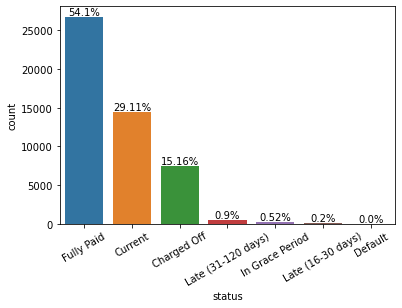

In [10]:
ax = sns.countplot(x=df['status'],
                   order=df['status'].value_counts(ascending=False).index);
        
abs_values = df['status'].value_counts(ascending=False)
rel_values = df.status.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
#lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=rel_values)

plt.xticks(rotation=30)
plt.show()

In [11]:
# Consolidate values in the status variable.                      
df['status'] = df['status'].replace(['Fully Paid', 'In Grace Period', 'Current','Late (16-30 days)','Late (31-120 days)'], float(0))
df['status'] = df['status'].replace(['Charged Off', 'Default'], float(1))

df['status'].value_counts()

0.0    41975
1.0     7504
Name: status, dtype: int64

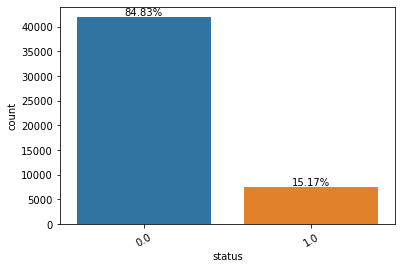

In [12]:
ax = sns.countplot(x=df['status'],
                   order=df['status'].value_counts(ascending=False).index);
        
rel_values = df.status.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
ax.bar_label(container=ax.containers[0], labels=rel_values)

plt.xticks(rotation=30)
plt.show()

In [13]:
df['home'].value_counts()

MORTGAGE    24786
RENT        19501
OWN          5192
Name: home, dtype: int64

In [14]:
df['employment'].value_counts()

unknown_employment             2743
Teacher                         924
Manager                         806
RN                              402
Registered Nurse                386
                               ... 
house officer                     1
Kitchen Maneger                   1
Network Systems Analyst III       1
Sr CAD Operator                   1
welding tech                      1
Name: employment, Length: 21213, dtype: int64

In [15]:
df['reason'].value_counts()

debt_consolidation    29648
credit_card           11837
home_improvement       2890
other                  2168
major_purchase          891
medical                 491
small_business          431
car                     375
moving                  282
vacation                266
house                   162
renewable_energy         36
wedding                   2
Name: reason, dtype: int64

In [16]:
df['grade'].value_counts()

C    13981
B    13650
A     8162
D     8065
E     4135
F     1214
G      272
Name: grade, dtype: int64

In [17]:
def gradeDefault(data):
    Grade = df['grade'].value_counts().index
    grade_rate = list(df.groupby('grade').status.value_counts(normalize=True))
    default_score = []
    for count, num in enumerate(grade_rate):
        if count%2 == 1:
            default_score.append(num)
    
    grade_default_score = pd.DataFrame(default_score,Grade)
    return grade_default_score

gradeDefault(df)

,0
C,0.047660
B,0.091648
A,0.161648
D,0.230750
E,0.284643
F,0.370675
G,0.426471


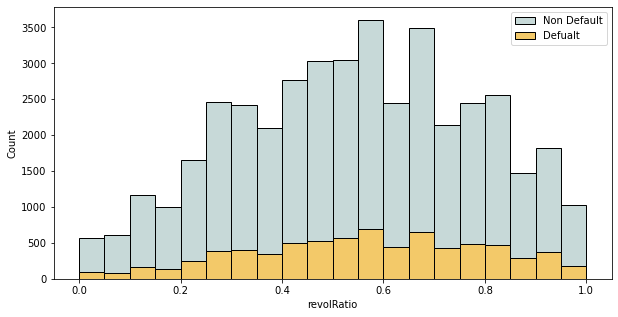

In [18]:
plt.figure(figsize=(10, 5))
binwidth = 0.05
bin_value =np.arange(0, 1.00 + binwidth, binwidth)
#custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.histplot(df[df['status'] == 0.0]['revolRatio'], bins = bin_value, label='Non Default', color = '#74a09e', alpha = 0.4)
sns.histplot(df[df['status'] == 1.0]['revolRatio'], bins = bin_value, label='Defualt', color = '#f3c969', alpha = 1)
plt.legend(loc= 'upper right')

In [20]:
loan_loyal = pd.crosstab(df['revolRatio'],df['status']).apply(lambda x: x/x.sum(), axis = 1).reset_index()

In [21]:
loan_loyal['revolRatio']

0      0.00
1      0.01
2      0.02
3      0.03
4      0.04
       ... 
116    1.21
117    1.22
118    1.26
119    1.29
120    1.67
Name: revolRatio, Length: 121, dtype: float64

In [22]:
loan_loyal[1]

0      0.173469
1      0.208696
2      0.125000
3      0.129630
4      0.094488
         ...   
116    0.000000
117    0.000000
118    1.000000
119    0.000000
120    0.000000
Name: 1.0, Length: 121, dtype: float64

In [23]:
loan_loyal[0]

0      0.826531
1      0.791304
2      0.875000
3      0.870370
4      0.905512
         ...   
116    1.000000
117    1.000000
118    0.000000
119    1.000000
120    1.000000
Name: 0.0, Length: 121, dtype: float64

Inflection points location on revolRatio: 16
Inflection points location on revolRatio: 39
Inflection points location on revolRatio: 65
Inflection points location on revolRatio: 98
Inflection points location on revolRatio: 117


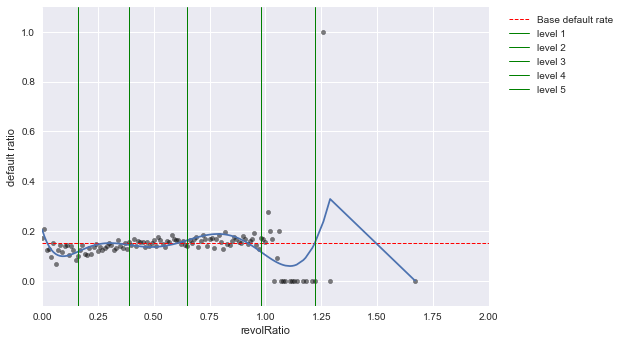

In [24]:
loan_loyal = pd.crosstab(df['revolRatio'],df['status']).apply(lambda x: x/x.sum(), axis = 1)
loan_loyal = loan_loyal.reset_index()
plt.style.use('seaborn')
plt.scatter(loan_loyal['revolRatio'], loan_loyal[1], s=20, color = 'k', alpha=0.5)
plt.xlim(0, 2)
# Set the range of y-axis
plt.ylim(-0.1, 1.1)
plt.xlabel('revolRatio')
plt.ylabel('default ratio')

plt.axhline(y=0.1517, color='r',linewidth=1, linestyle='--',label='Base default rate')
plt.legend()
z = np.polyfit(loan_loyal['revolRatio'], loan_loyal[1], 7)
p = np.poly1d(z)
dy = p(loan_loyal['revolRatio']) - loan_loyal[0]
plt.plot(loan_loyal['revolRatio'], p(loan_loyal['revolRatio']))
dev2 = np.gradient(np.gradient(p(loan_loyal['revolRatio']))) # second order derivatives
infls = np.where(np.diff(np.sign(dev2)))[0] # points where the sign of curve slope changes
for i, infl in enumerate(infls, 1):
    print('Inflection points location on revolRatio:', infl)
    plt.axvline(x=loan_loyal['revolRatio'][infl], color='green', linewidth=1,label=f'level {i}')
    #plt.axvspan(loan_loyal['revolRatio'][infl], loan_loyal['revolRatio'][infl+1], color='green', alpha=0.2)
    plt.legend(bbox_to_anchor=(1.3, 1.0))
plt.show()


In [25]:
np.where(np.diff(np.sign(dev2)))[0]

array([ 16,  39,  65,  98, 117], dtype=int64)

In [26]:
loan_loyal['revolRatio'][np.where(np.diff(np.sign(dev2)))[0]]

16     0.16
39     0.39
65     0.65
98     0.98
117    1.22
Name: revolRatio, dtype: float64

In [27]:
def level(x):
    if x <= 0.16:
        return 1
    elif 0.16 < x <= 0.38:
        return 2
    elif 0.38 < x <= 0.65:
        return 3
    elif 0.65 < x <= 0.98:
        return 4
    elif 0.98 < x <= 1.22:
        return 5
    else:
        return 6

In [28]:
dataframe = pd.DataFrame(df, columns = ['revolRatio','status'])
# selecting rows based on condition
slt_df = dataframe[(dataframe['status'] == 1)]
#print('\nresult dataframe :\n', rslt_df)df['status']).value_counts())

In [29]:
df_val_counts = pd.DataFrame(slt_df['revolRatio'].value_counts())
df_val_counts

,revolRatio
0.58,137
0.52,131
0.69,128
0.59,127
0.53,123
...,...
1.02,8
1.03,3
1.06,1
1.05,1


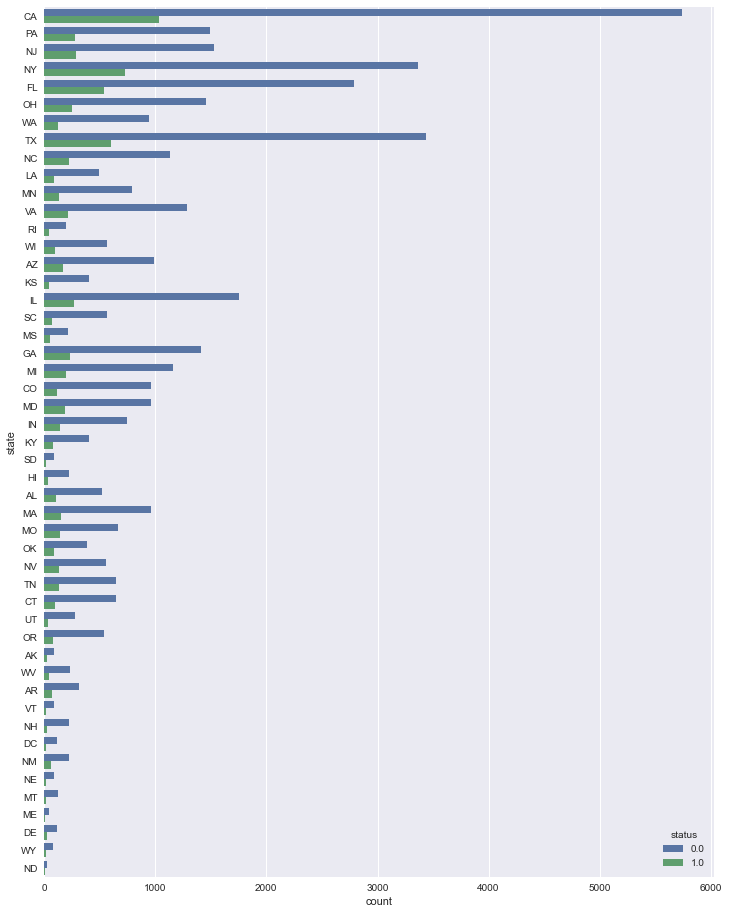

In [30]:
plt.figure(figsize=(12,16))
sns.countplot(y='state', hue= 'status', data=df)
state_rate = list(df.groupby('state').status.value_counts(normalize=True))


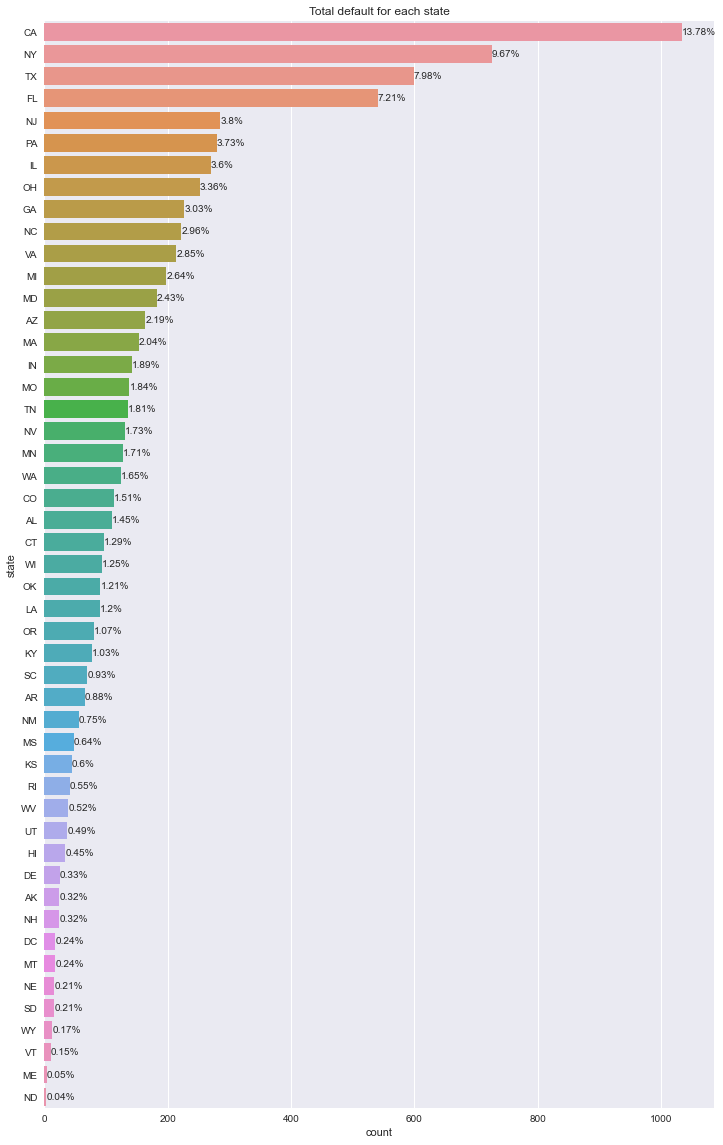

In [31]:
df_default = df[df['status']==1]
df_default_state = df_default['state']

plt.figure(figsize=(12,20))
ax = sns.countplot(y = df_default_state, order = df_default_state.value_counts().index)

rel_values = df_default_state.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
ax.bar_label(container=ax.containers[0], labels=rel_values)

plt.title('Total default for each state')
plt.show()

In [32]:
def stateDefault(data):
    State = df['state'].value_counts().index
    state_rate = list(df.groupby('state').status.value_counts(normalize=True))
    default_score = []
    for count, num in enumerate(state_rate):
        if count%2 == 1:
            default_score.append(num)
    
    state_default_score = pd.DataFrame(default_score,State)
    return state_default_score

stateDefault(df)

,0
CA,0.212389
NY,0.173844
TX,0.176000
FL,0.142114
IL,0.152597
NJ,0.105410
PA,0.130904
OH,0.139535
GA,0.185185
VA,0.162365


In [33]:
#transform the numeric,ordinal, category data

class Transformer(object):
    def __init__(self):
        self.mean = 0
     
    def fit(self, X, y=None): 
        
        df['length'] = X.length.map(self.length2num)
        df['term'] = X.term.map(self.term2num)
        df['employment'] = X.employment.map(self.employment2num)
        df['state'] = X.state.map(self.state2num)
   
        # for home,reason,verified 
        self.home_count = X.home.value_counts()
        self.reason_count = X.reason.value_counts()
        self.verified_count = X.verified.value_counts()
    
       
    def transform(self, X, y=None):
               
        #for home, reason,verified,grade
        df['home'] = X.home.map(lambda x: self.home_count[x])
        df['reason'] = X.reason.map(lambda x: self.reason_count[x])
        df['verified'] = X.verified.map(lambda x: self.verified_count[x])
        df['grade'] = X.grade.map(self.grade_score)
        # for length, term, employment,state
        df['length'] = X.length.map(self.length2num)
        df['term'] = X.term.map(self.term2num)
        df['employment'] = X.employment.map(self.employment2num)
        df['state'] = X.state.map(self.state2num)
 
        
        return df[['term','rate','payment','amount','grade','length','home', 'income','verified', 'reason', 'debtIncRat', 'state',
                    'delinq2yr', 'inq6mth', 'openAcc', 'pubRec', 'revolRatio', 'totalAcc', 'totalBal', 'totalRevLim', 'employment',
                    'totalLim', 'accOpen24', 'avgBal', 'bcOpen', 'bcRatio', 'totalRevBal', 'totalBcLim', 'totalIlLim','status']]
            
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def length2num(self, x):
        if type(x) == str and x == 'unknown_length':
            x = x.strip('unknown_length')
            x = float(0)
        if type(x) == str:
            x = x.strip('years')
            if x == '10+ ':
                x = x.split('+')
                x = float(x[0])
            elif x == '< 1 ':
                x = x.split(' ')
                x = float(x[1])
            else:
                x = float(x)
        return x
    
    def term2num(self, x):
        if type(x) == str:
            x = x.strip('months')
        return float(x)
    
    
    def employment2num(self, x):
        if type(x) == str and x =='unkown_employement':
            x = x.strip('unknown_length')
            x = float(1)
            
        elif type(x) == str:
            x = float(0)
        return x
    
    def state2num(self, x):
        if type(x) == str and x == 'CA':
            x = float(3)
        elif type(x) == str and x == 'NY' or x =='TX' or x == 'FL':
            x = float(2)
        elif type(x) == str:
            x = float(1)
        return x
    
    
    
    def grade_score(self, x):
        if x == 'C':
            return 0.047660
        if x == 'B':
            return 0.091648
        if x == 'A':
            return  0.161648
        if x == 'D':
            return 0.230750
        if x == 'E':
            return 0.284643
        if x == 'F':
            return 0.370675
        if x == 'G':
            return 0.426471
          
   

In [34]:
ct = Transformer()
df1 = ct.fit_transform(df)

#### Employment feature will not be used since there are not specific to certain type of employment. 
#### TotalPaid will not be used because it can only be determined after a loan is issued.
#### LoanID and State will be dropped since it contains the state info of the borrower and has too many categorical values that are not related with default information. 

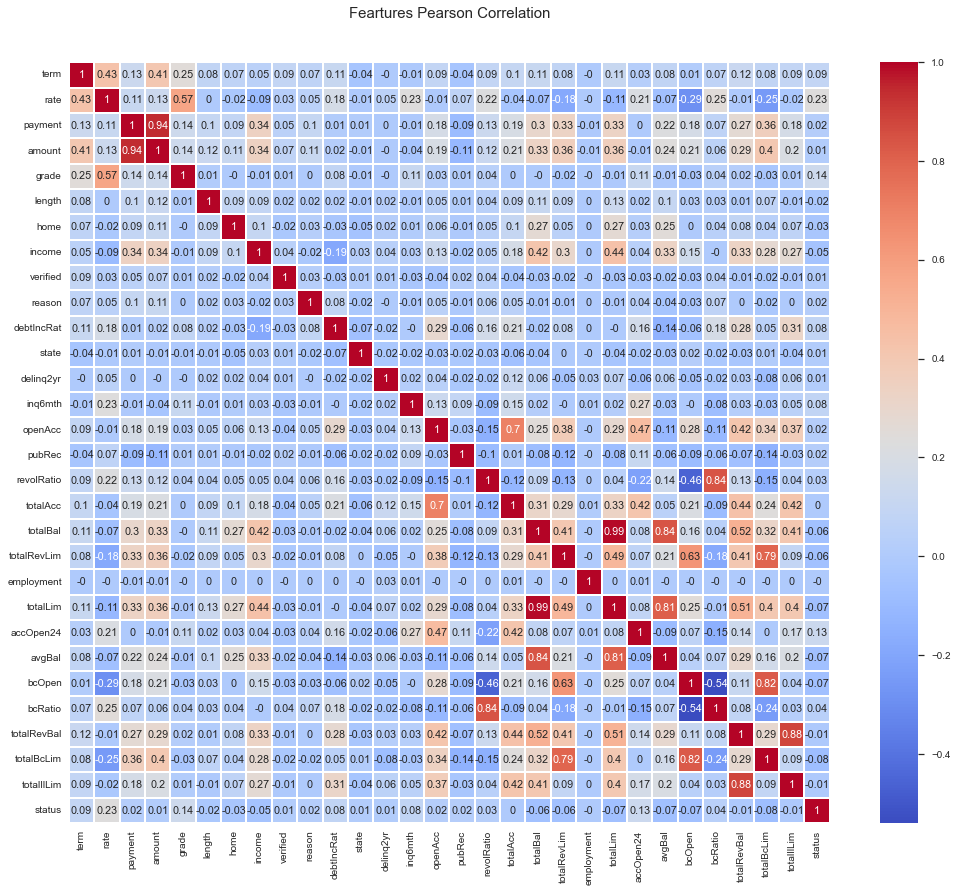

In [35]:
def pearson_corr(df):
    
    
    correlation = df.astype(float).corr(method='pearson')
    colormap = plt.cm.RdBu
    
    plt.figure(figsize=(18,14))
    plt.title('Feartures Pearson Correlation', y=1.05, size=15)
    sns.set(font_scale=0.9)
    sns.heatmap(round(correlation,2),linewidths=0.1,vmax=1.0, square=True,  
                cmap='coolwarm', linecolor='white', annot=True)
    plt.show()

pearson_corr(df1)

Text(0.5, 1.0, 'Correlation with TARGET variable')

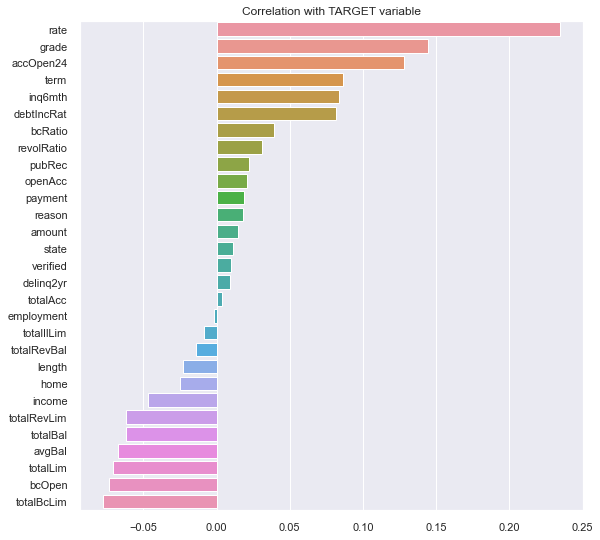

In [36]:
sns.set(font_scale=1)
corr_with_status = df1.corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(9, 9))
sns.barplot(x=corr_with_status.values, y=corr_with_status.index)
plt.title('Correlation with TARGET variable')

## Feature Engineering

 #### From Pearson correlation map, payment and amount highly correlated, remove amount.
#### TatalLim and totalBal are highly correlated, create new feature using these two: DTI  
  

In [37]:
df2 = df1.drop(['amount'], axis=1)

### Creat three features:   rat_deb_inc = rate * debtincRat 
###  rat_revo = rate * revolRatio
### DTI = totalBal / totalLim

In [38]:
df2['rat_deb_inc'] = df2['rate']*df2['debtIncRat']
df2['rat_revo'] = df2['rate']*df2['revolRatio']
df2['DTI'] = df2['totalBal']/df2['totalLim']

In [39]:
df2 = df2.drop(columns=['debtIncRat','totalLim'])
df2.head()

,term,rate,payment,grade,length,home,income,verified,reason,state,...,avgBal,bcOpen,bcRatio,totalRevBal,totalBcLim,totalIlLim,status,rat_deb_inc,rat_revo,DTI
0,36.0,0.14,272.07,0.047660,3.0,19501,49966.0,20914,11837,3.0,...,4369.0,43.0,95.7,48054.0,1000.0,52529.0,1.0,4.2070,0.0770,0.792591
1,36.0,0.10,354.89,0.091648,10.0,24786,50000.0,14261,29648,1.0,...,22153.0,19756.0,37.5,11844.0,31600.0,0.0,0.0,0.8740,0.0360,0.893573
2,36.0,0.15,1220.33,0.230750,10.0,19501,360000.0,14304,29648,3.0,...,121450.0,7686.0,83.2,173260.0,83000.0,100000.0,0.0,2.1750,0.1245,0.937011
3,60.0,0.12,447.83,0.047660,2.0,24786,60000.0,20914,29648,3.0,...,1723.0,11061.0,1.2,20671.0,11200.0,32764.0,0.0,1.6968,0.0012,0.440146
4,60.0,0.12,266.88,0.091648,10.0,24786,64000.0,20914,29648,1.0,...,18291.0,5904.0,58.4,8475.0,14200.0,0.0,0.0,0.6168,0.0696,0.951218


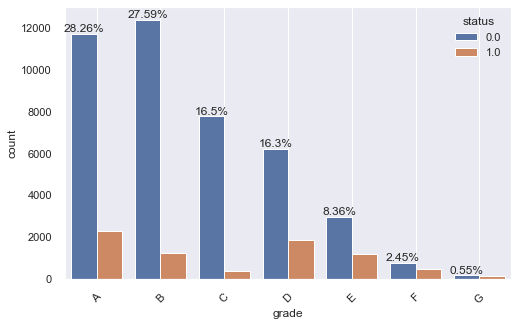

In [40]:
# Visualize the status counts for each risk grade (A is least risk, # G is most risk).
fig, ax = plt.subplots(figsize=(8,5))
g = sns.countplot(x=df['grade'],
                   order=df['grade'].value_counts(ascending=False).index, hue='status', data=df1)

rel_values = df.grade.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
g.bar_label(container=g.containers[0], labels=rel_values)

plt.xticks(range(0,7),
           ["A",'B','C','D','E','F','G'], rotation=45)
plt.grid()

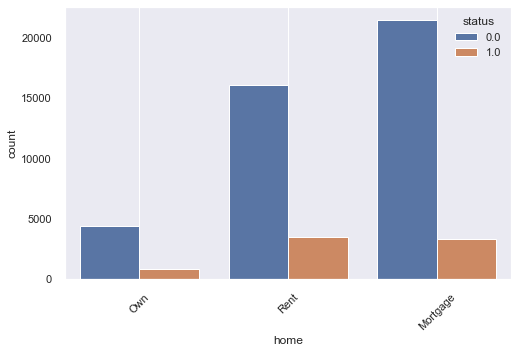

In [41]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='home',hue='status',data=df1)
plt.xticks(range(0,3),
           ["Own", "Rent", "Mortgage"], rotation=45)
plt.grid()

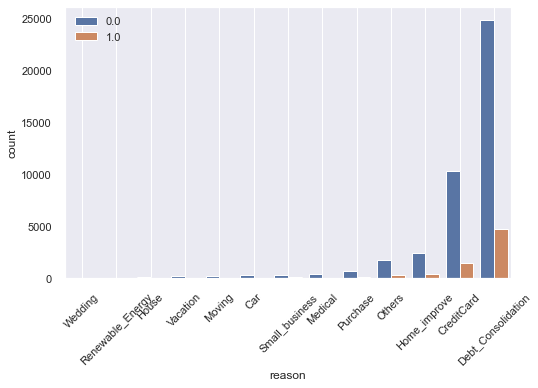

In [42]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='reason',hue='status',data=df1)
plt.xticks(range(0,13),
           ["Wedding", "Renewable_Energy", "House",'Vacation','Moving','Car','Small_business',
            'Medical','Purchase','Others','Home_improve','CreditCard','Debt_Consolidation'], rotation=45)
plt.grid()
plt.legend(loc='upper left')

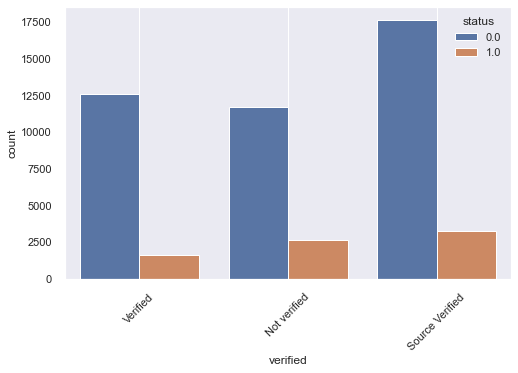

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='verified',hue='status',data=df1)
plt.xticks(range(0,3),
           ["Verified", "Not verified", "Source Verified"], rotation=45)
plt.grid()

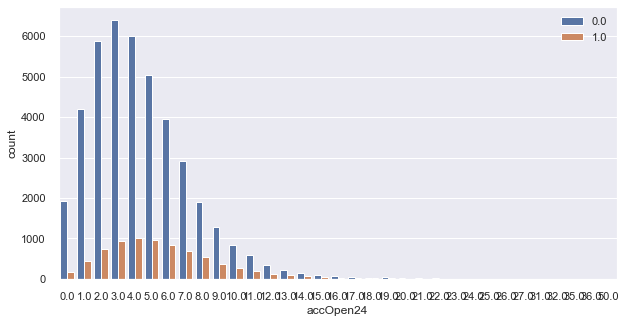

In [44]:
# Visualize the status counts for number of accounts opened in the last 24 months.
plt.figure(figsize=(10, 5))
sns.countplot(x='accOpen24', hue='status', data = df1)
plt.legend(loc='upper right')

<AxesSubplot:xlabel='inq6mth', ylabel='count'>

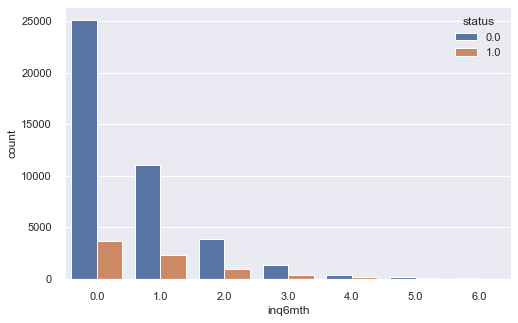

In [45]:
# Visualize the status counts for number of credit checks in the past 6 months.
plt.figure(figsize=(8, 5))
sns.countplot(x='inq6mth', hue='status', data = df1)

<AxesSubplot:xlabel='length', ylabel='count'>

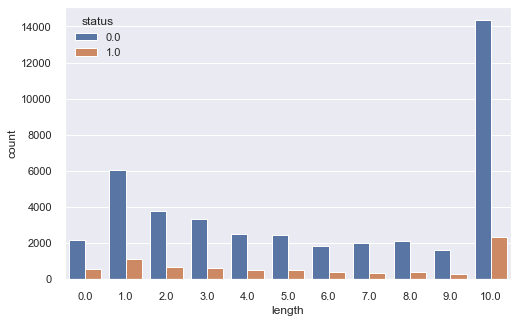

In [46]:
# Visualize the status counts for length of employment.
plt.figure(figsize=(8, 5))
                 
sns.countplot(x='length', 
              data = df1, 
              hue ='status') 
              

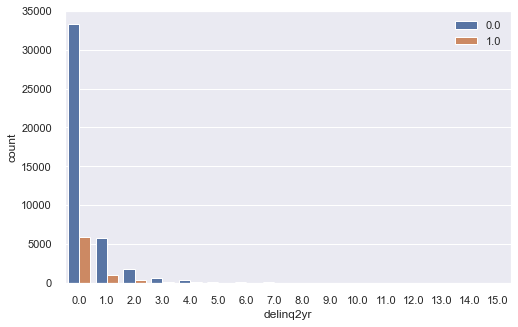

In [47]:
# Visualize the status counts for number of 30+ day late payments in # last two years.
plt.figure(figsize=(8, 5))
sns.countplot(x='delinq2yr', hue='status', data = df1)
plt.legend(loc='upper right')

<AxesSubplot:xlabel='term', ylabel='count'>

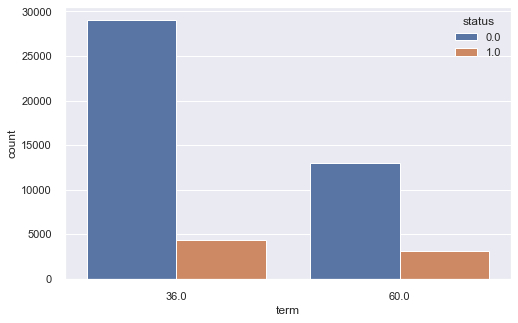

In [48]:
# Visualize the status counts for term of loan.
plt.figure(figsize=(8, 5))
sns.countplot(x='term', hue='status', data = df1)

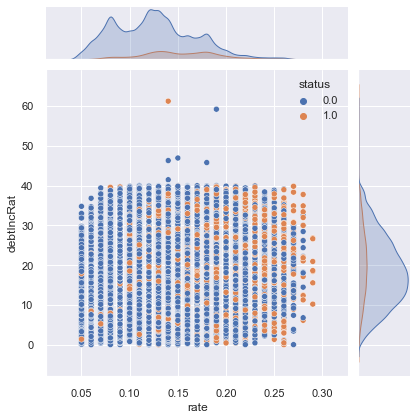

In [49]:
# Visualize the status with rate and deb with income ratio
sns.jointplot(x='rate',y='debtIncRat',data=df,hue='status')

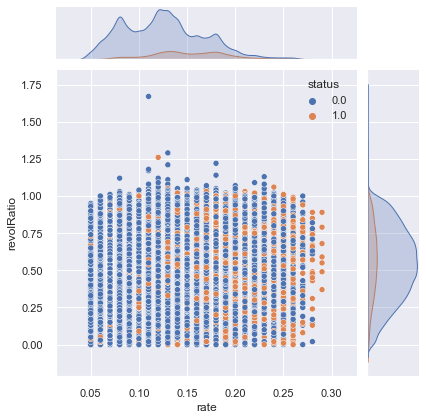

In [50]:
# Visualize the status with rate and deb with income ratio
sns.jointplot(y='revolRatio',x='rate',data=df,hue='status')

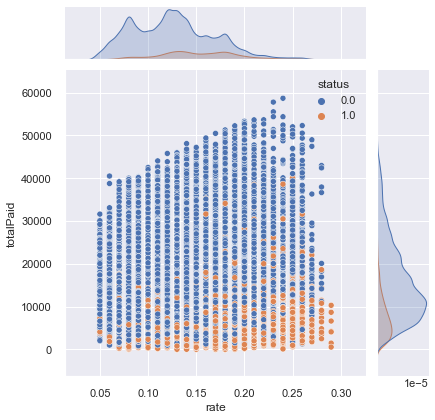

In [51]:
# Visualize the status with rate and deb with income ratio
sns.jointplot(y='totalPaid',x='rate',data=df,hue='status')

<AxesSubplot:xlabel='pubRec', ylabel='count'>

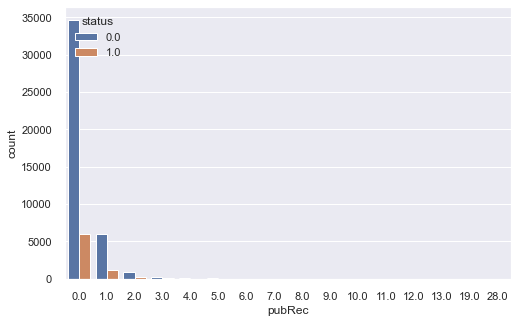

In [52]:
# Visualize the number of derogatory public records including bankrupcy fillings etc.
plt.figure(figsize=(8, 5))
sns.countplot(x='pubRec', hue='status', data = df1)

In [53]:
train,test = train_test_split(df2, test_size=0.3, random_state=42)


In [54]:
train.head()

,term,rate,payment,grade,length,home,income,verified,reason,state,...,avgBal,bcOpen,bcRatio,totalRevBal,totalBcLim,totalIlLim,status,rat_deb_inc,rat_revo,DTI
1973,36.0,0.15,103.49,0.047660,10.0,24786,55600.0,14304,2168,1.0,...,11809.0,2031.0,85.0,45373.0,13500.0,37242.0,0.0,3.7620,0.0855,0.858024
17018,36.0,0.09,267.79,0.091648,5.0,24786,75000.0,14304,29648,1.0,...,14007.0,1978.0,60.4,30900.0,5000.0,25628.0,1.0,0.8973,0.0495,0.907904
44613,36.0,0.18,107.82,0.230750,10.0,24786,88000.0,14304,29648,3.0,...,2808.0,3650.0,73.6,56155.0,13800.0,51105.0,0.0,4.9644,0.1224,0.773432
6525,36.0,0.10,270.10,0.091648,1.0,19501,80000.0,14304,2168,1.0,...,8526.0,1612.0,73.1,42631.0,6000.0,49480.0,0.0,1.7760,0.0730,0.768403
4492,36.0,0.10,309.72,0.091648,7.0,19501,35000.0,14261,2890,2.0,...,1112.0,4843.0,31.0,11125.0,33900.0,0.0,0.0,1.1660,0.0280,0.280934


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34635 entries, 1973 to 15959
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   term         34635 non-null  float64
 1   rate         34635 non-null  float64
 2   payment      34635 non-null  float64
 3   grade        34635 non-null  float64
 4   length       34635 non-null  float64
 5   home         34635 non-null  int64  
 6   income       34635 non-null  float64
 7   verified     34635 non-null  int64  
 8   reason       34635 non-null  int64  
 9   state        34635 non-null  float64
 10  delinq2yr    34635 non-null  float64
 11  inq6mth      34635 non-null  float64
 12  openAcc      34635 non-null  float64
 13  pubRec       34635 non-null  float64
 14  revolRatio   34635 non-null  float64
 15  totalAcc     34635 non-null  float64
 16  totalBal     34635 non-null  float64
 17  totalRevLim  34635 non-null  float64
 18  employment   34635 non-null  float64
 19  a

In [56]:
train.shape

(34635, 30)

In [57]:
target = train['status']


## Logistic Regression

In [62]:
features = list(train.columns)
target = ['status']
features = [fea for fea in features if fea not in target]
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [63]:
steps = [('rescale', MinMaxScaler()),
         ('logr',  LogisticRegression(class_weight='balanced'))]

model_lg = Pipeline(steps)
model_lg = model_lg.fit(X_train, y_train)



In [64]:
y_train_pred_lg = model_lg.predict(X_train)
accuracy_score(y_train, y_train_pred_lg)

0.6379673740435975

In [65]:
y_test_pred_lg = model_lg.predict(X_test)
accuracy_score(y_test, y_test_pred_lg)

0.6316356777149016

In [66]:
classification_report(y_train,y_train_pred_lg)
print(classification_report(y_train,y_train_pred_lg))

              precision    recall  f1-score   support

         0.0       0.92      0.63      0.75     29418
         1.0       0.24      0.67      0.36      5217

    accuracy                           0.64     34635
   macro avg       0.58      0.65      0.55     34635
weighted avg       0.81      0.64      0.69     34635



In [67]:
classification_report(y_test,y_test_pred_lg)
print(classification_report(y_test,y_test_pred_lg))

              precision    recall  f1-score   support

         0.0       0.91      0.63      0.74     12557
         1.0       0.24      0.66      0.36      2287

    accuracy                           0.63     14844
   macro avg       0.58      0.65      0.55     14844
weighted avg       0.81      0.63      0.68     14844



<AxesSubplot:>

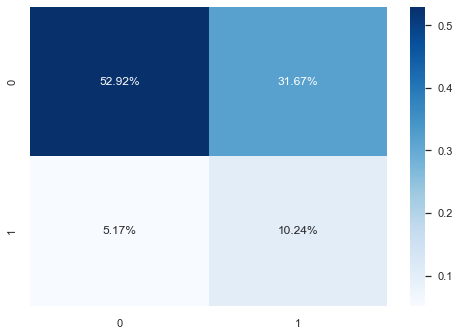

In [68]:
# Show Confusion Maxtrix.
cm = confusion_matrix(y_test, y_test_pred_lg)
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [69]:
y_train_proba = model_lg.predict_proba(X_train)
y_train_proba

array([[0.39313099, 0.60686901],
       [0.59312091, 0.40687909],
       [0.18670534, 0.81329466],
       ...,
       [0.81797956, 0.18202044],
       [0.35861218, 0.64138782],
       [0.36115995, 0.63884005]])

In [70]:
y_test_proba = model_lg.predict_proba(X_test)
y_test_proba

array([[0.66382882, 0.33617118],
       [0.53729649, 0.46270351],
       [0.23435929, 0.76564071],
       ...,
       [0.43014897, 0.56985103],
       [0.78986414, 0.21013586],
       [0.347107  , 0.652893  ]])

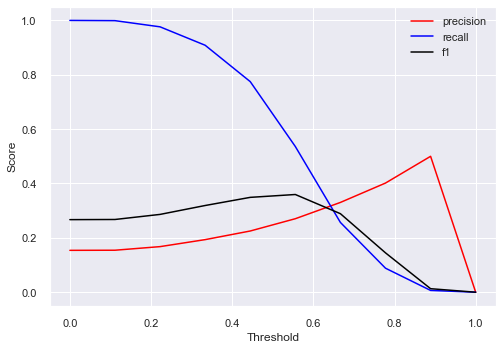

In [71]:
thresholds = np.linspace(0, 1, 10)
precisions = []
recalls = []
f1s = []
ave = "binary"

for cut in thresholds:
    y_test_predic = (y_test_proba[:, 1] > cut).astype(int)
    precisions.append(precision_score(y_test, y_test_predic, average=ave))
    recalls.append(recall_score(y_test, y_test_predic, average=ave))
    f1s.append(f1_score(y_test, y_test_predic, average=ave))

plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [72]:
# calculate roc curves
y_test_proba_class_1 = y_test_proba[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba_class_1)

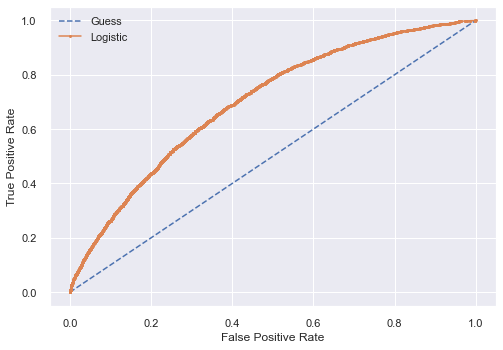

In [73]:
plt.plot([0,1], [0,1], linestyle='--', label='Guess')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


In [74]:
roc_auc_score(y_train, y_train_proba[:, 1])

0.7045566750046423

In [75]:
roc_auc_score(y_test, y_test_proba[:, 1])

0.700241093878203

In [76]:
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test,y_test_proba[:,1])

In [77]:
importances = pd.DataFrame(data={
                        'Attribute': X_train.columns,
                        'Importance': model_lg.steps[1][1].coef_[0]
              })
importances = importances.sort_values(by='Importance', ascending=False)

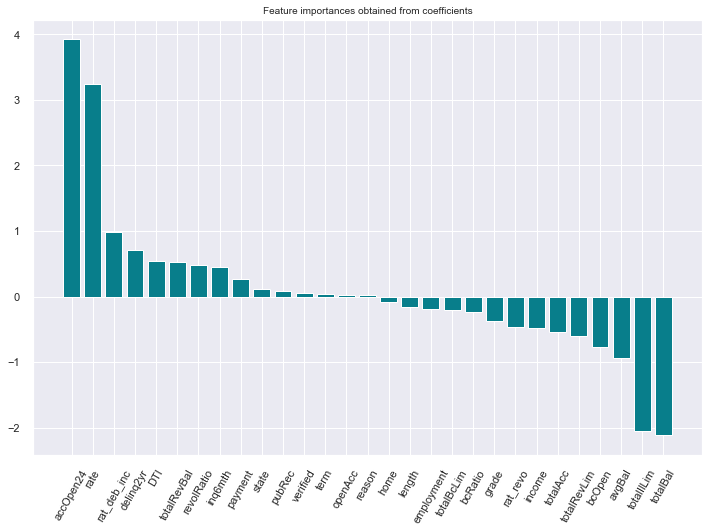

In [78]:
plt.figure(figsize=(12, 8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='60')
plt.show()

## Try oversampling and undersampling method

### Oversample

In [79]:
#Create an oversampled training data
smote = SMOTE(random_state = 42, sampling_strategy=0.5)
X_train_o, y_train_o = smote.fit_resample(X_train, y_train)

In [80]:
steps = [('rescale', MinMaxScaler()),
         ('logr',  LogisticRegression())]

model_lgo = Pipeline(steps)
model_lgo = model_lgo.fit(X_train_o, y_train_o)

In [81]:
y_train_pred_o = model_lgo.predict(X_train_o)
accuracy_score(y_train_o, y_train_pred_o)

0.6877875223785891

In [82]:
y_test_pred_o = model_lgo.predict(X_test)
accuracy_score(y_test, y_test_pred_o)

0.7982349770951226

In [83]:
classification_report(y_test,y_test_pred_o)
print(classification_report(y_test,y_test_pred_o))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     12557
         1.0       0.32      0.29      0.30      2287

    accuracy                           0.80     14844
   macro avg       0.60      0.59      0.59     14844
weighted avg       0.79      0.80      0.79     14844



<AxesSubplot:>

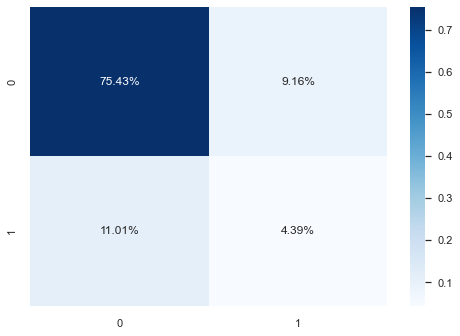

In [84]:
# Show Confusion Maxtrix.
cm = confusion_matrix(y_test, y_test_pred_o)
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [85]:
y_train_proba = model_lgo.predict_proba(X_train_o)
y_test_proba = model_lgo.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.7002268866909612

In [86]:
# try borderlineSMOTE 
bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_train_o2, y_train_o2 = bsmote.fit_resample(X_train, y_train)

In [87]:
steps = [('rescale', MinMaxScaler()),
         ('logr',  LogisticRegression())]

model_lgo2 = Pipeline(steps)
model_lgo2 = model_lgo2.fit(X_train_o2, y_train_o2)

In [88]:
y_train_pred_o2 = model_lgo2.predict(X_train_o2)
accuracy_score(y_train_o2, y_train_pred_o2)

0.6750458902712625

In [89]:
y_test_pred_o2 = model_lgo2.predict(X_test)
accuracy_score(y_test, y_test_pred_o2)

0.647399622743196

In [90]:
classification_report(y_test,y_test_pred_o2)
print(classification_report(y_test,y_test_pred_o2))

              precision    recall  f1-score   support

         0.0       0.91      0.65      0.76     12557
         1.0       0.25      0.64      0.36      2287

    accuracy                           0.65     14844
   macro avg       0.58      0.64      0.56     14844
weighted avg       0.81      0.65      0.70     14844



<AxesSubplot:>

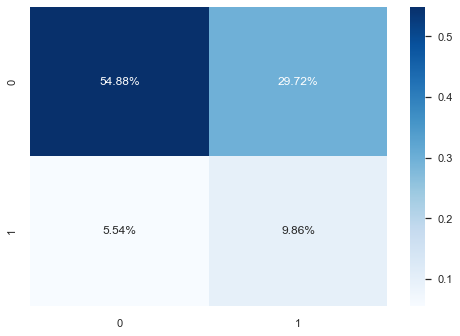

In [91]:
# Show Confusion Maxtrix.
cm = confusion_matrix(y_test, y_test_pred_o2)
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'Blues')

### Undersample

In [92]:
#Create an undersampled training data
under = RandomUnderSampler(random_state = 42, sampling_strategy=0.5)
X_train_u, y_train_u = under.fit_resample(X_train, y_train)

In [93]:
steps = [('rescale', MinMaxScaler()),
         ('logr',  LogisticRegression())]

model_lgu = Pipeline(steps)
model_lgu = model_lgu.fit(X_train_u, y_train_u)

In [94]:

y_train_pred_u = model_lgu.predict(X_train_u)
accuracy_score(y_train_u, y_train_pred_u)

0.6940770557791834

In [95]:
y_test_pred_u = model_lgu.predict(X_test)
accuracy_score(y_test, y_test_pred_u)

0.8042306655887901

In [96]:
classification_report(y_test,y_test_pred_u)
print(classification_report(y_test,y_test_pred_u))


              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     12557
         1.0       0.33      0.27      0.30      2287

    accuracy                           0.80     14844
   macro avg       0.60      0.58      0.59     14844
weighted avg       0.79      0.80      0.80     14844



<AxesSubplot:>

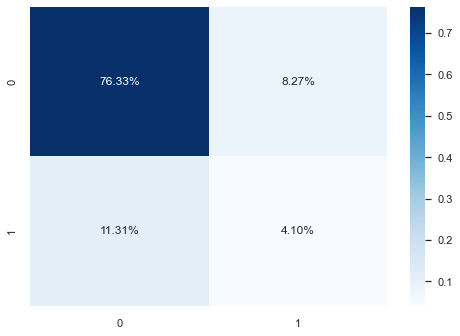

In [97]:
# Show Confusion Maxtrix.
cm = confusion_matrix(y_test, y_test_pred_u)
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [98]:
y_train_proba = model_lgu.predict_proba(X_train_u)
y_test_proba = model_lgu.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.7001881999629568

## Random Forest Classifier

In [99]:
steps = [('rescale', MinMaxScaler()),
         ('rf', RandomForestClassifier(random_state=42))]

model_rf = Pipeline(steps)
model_rf = model_rf.fit(X_train, y_train)



In [100]:
y_train_pred_2 = model_rf.predict(X_train)
y_test_pred_2 = model_rf.predict(X_test)
rf = accuracy_score(y_test,y_test_pred_2)
print('RandomForestClassifier accuracy score =',rf)

RandomForestClassifier accuracy score = 0.846065750471571


<AxesSubplot:>

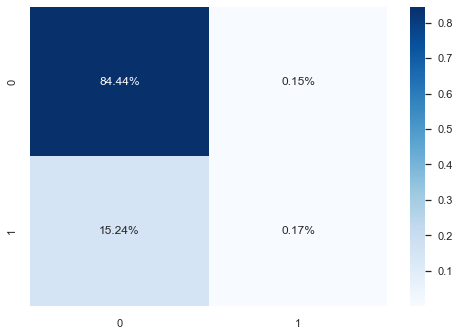

In [101]:
cm = confusion_matrix(y_test, y_test_pred_2)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [102]:
classification_report(y_test,y_test_pred_2)
print(classification_report(y_test,y_test_pred_2))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     12557
         1.0       0.52      0.01      0.02      2287

    accuracy                           0.85     14844
   macro avg       0.68      0.50      0.47     14844
weighted avg       0.80      0.85      0.78     14844



In [103]:
classification_report(y_train,y_train_pred_2)
print(classification_report(y_train,y_train_pred_2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29418
         1.0       1.00      1.00      1.00      5217

    accuracy                           1.00     34635
   macro avg       1.00      1.00      1.00     34635
weighted avg       1.00      1.00      1.00     34635



In [104]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [105]:
hyperP = {'rf__max_depth': [100,150,200],
          'rf__min_samples_leaf': [1, 3, 5],
           'rf__min_samples_split': [2, 3, 5] }

In [106]:
steps = [('rescale', MinMaxScaler()),
         ('rf',  RandomForestClassifier(n_estimators=100, random_state=42))]

model_rf_2 = Pipeline(steps)

In [107]:
model_gridsv = GridSearchCV(model_rf_2, hyperP, cv = 5, n_jobs=-1)

In [108]:
# model_gridsv = model_gridsv.fit(X_train,y_train)

In [109]:
# model_gridsv.best_params_

In [110]:
steps = [('rescale', MinMaxScaler()),
         ('rf',  RandomForestClassifier(n_estimators=100, random_state=42, max_depth=100, 
                                        min_samples_leaf= 3, min_samples_split= 2))]
model_rf_3 = Pipeline(steps)


In [111]:
model_rf_3 = model_rf_3.fit(X_train, y_train)

In [112]:
y_test_pred_3 = model_rf_3.predict(X_test)
rf = accuracy_score(y_test,y_test_pred_3)
print('RandomForestClassifier accuracy score =',rf)

RandomForestClassifier accuracy score = 0.8464699541902452


In [113]:
classification_report(y_test,y_test_pred_3)
print(classification_report(y_test,y_test_pred_3))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     12557
         1.0       0.60      0.01      0.02      2287

    accuracy                           0.85     14844
   macro avg       0.72      0.50      0.47     14844
weighted avg       0.81      0.85      0.78     14844



<AxesSubplot:>

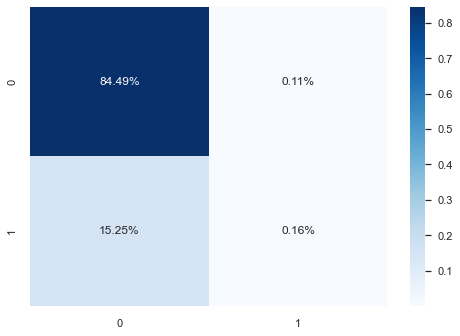

In [114]:
cm = confusion_matrix(y_test, y_test_pred_3)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [115]:
y_train_proba = model_rf_3.predict_proba(X_train)
y_test_proba = model_rf_3.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.6871542025469237

### Try oversample and undersample method on Random Forest 

In [116]:
steps = [('rescale', MinMaxScaler()),
         ('rf', RandomForestClassifier(random_state=42))]

model_rf = Pipeline(steps)
model_rfo = model_rf.fit(X_train_o, y_train_o)

In [117]:
y_train_pred_rfo = model_rfo.predict(X_train_o)
accuracy_score(y_train_o, y_train_pred_rfo)

0.9999773381376481

In [118]:
y_test_pred_rfo = model_rfo.predict(X_test)
accuracy_score(y_test, y_test_pred_rfo)

0.8438426300188628

In [119]:
classification_report(y_test,y_test_pred_rfo)
print(classification_report(y_test,y_test_pred_rfo))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     12557
         1.0       0.38      0.02      0.04      2287

    accuracy                           0.84     14844
   macro avg       0.62      0.51      0.48     14844
weighted avg       0.78      0.84      0.78     14844



<AxesSubplot:>

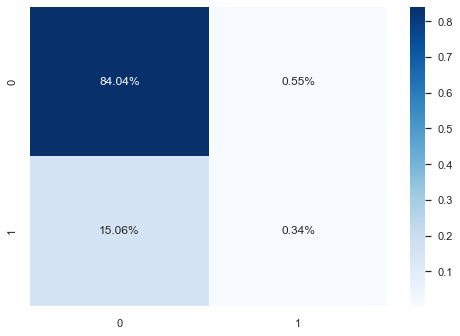

In [120]:
# Show Confusion Maxtrix.
cm = confusion_matrix(y_test, y_test_pred_rfo)
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [121]:
y_train_proba = model_rfo.predict_proba(X_train_o)
y_test_proba = model_rfo.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.6819276464864599

In [122]:
steps = [('rescale', MinMaxScaler()),
         ('rf', RandomForestClassifier(random_state=42))]

model_rf = Pipeline(steps)
model_rfu = model_rf.fit(X_train_u, y_train_u)

In [123]:
y_train_pred_rfu = model_rfu.predict(X_train_u)
accuracy_score(y_train_u, y_train_pred_rfu)

1.0

In [124]:
y_test_pred_rfu = model_rfu.predict(X_test)
accuracy_score(y_test, y_test_pred_rfu)

0.7917003503098895

In [125]:
classification_report(y_test,y_test_pred_rfu)
print(classification_report(y_test,y_test_pred_rfu))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88     12557
         1.0       0.31      0.29      0.30      2287

    accuracy                           0.79     14844
   macro avg       0.59      0.59      0.59     14844
weighted avg       0.79      0.79      0.79     14844



<AxesSubplot:>

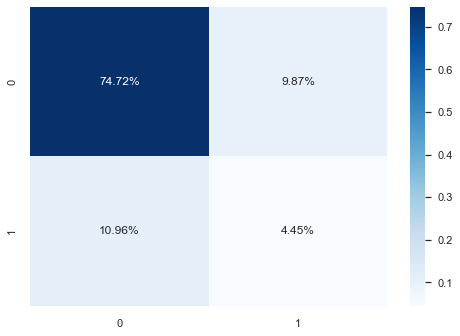

In [126]:
# Show Confusion Maxtrix.
cm = confusion_matrix(y_test, y_test_pred_rfu)
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [127]:
y_train_proba = model_rfu.predict_proba(X_train_u)
y_test_proba = model_rfu.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.6897274967468849

In [128]:
importance = model_rfu.steps[1][1].feature_importances_
sorted_indices= np.argsort(importance)[::-1]
features = X_train.columns[:]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f+1, 30,
                            features[sorted_indices[f]],
                            importance[sorted_indices[f]]))

 1) rat_deb_inc                    0.064748
 2) rate                           0.055385
 3) rat_revo                       0.051883
 4) payment                        0.051062
 5) avgBal                         0.049978
 6) totalBal                       0.048728
 7) DTI                            0.048563
 8) totalBcLim                     0.048401
 9) totalRevLim                    0.047801
10) income                         0.047075
11) bcOpen                         0.046998
12) bcRatio                        0.046572
13) totalRevBal                    0.045809
14) totalIlLim                     0.041955
15) totalAcc                       0.040810
16) revolRatio                     0.040628
17) accOpen24                      0.038964
18) grade                          0.034283
19) openAcc                        0.032685
20) length                         0.025404
21) inq6mth                        0.016087
22) reason                         0.015131
23) verified                    

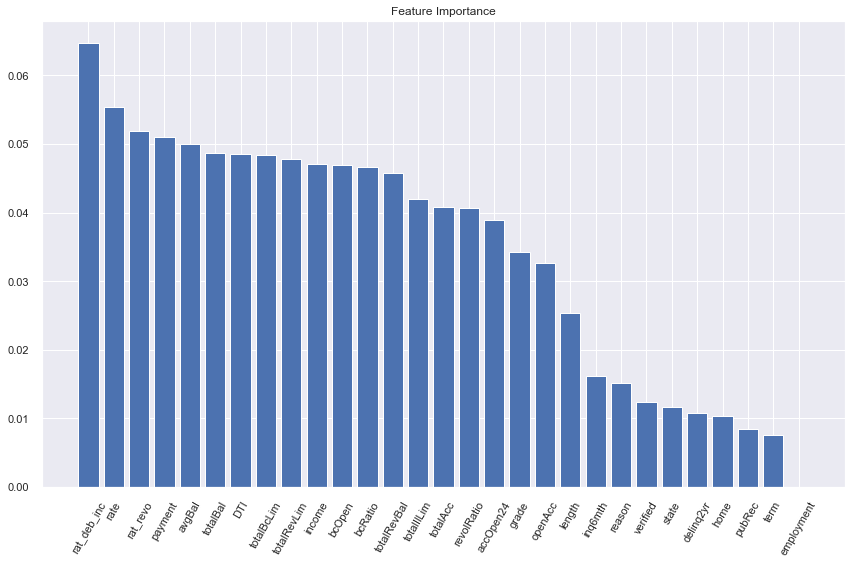

In [129]:
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importance [sorted_indices], align='center') 
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation = 60)

plt.tight_layout()


## XGBClassifier

In [130]:
from xgboost.sklearn import XGBClassifier

In [131]:
steps = [('rescale', MinMaxScaler()),
         ('xgbc',  XGBClassifier(random_state=42))]

model_xgb = Pipeline(steps)

In [132]:
model_xgb = model_xgb.fit(X_train,y_train)

In [133]:
y_train_pred_xgb = model_xgb.predict(X_train)

In [134]:
y_test_pred_xgb = model_xgb.predict(X_test)

In [135]:
accuracy_score(y_train, y_train_pred_xgb)

0.8874260141475386

In [136]:
accuracy_score(y_test, y_test_pred_xgb)

0.8408784694152519

In [137]:
print(classification_report(y_train, y_train_pred_xgb, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     29418
           1       0.98      0.26      0.41      5217

    accuracy                           0.89     34635
   macro avg       0.93      0.63      0.67     34635
weighted avg       0.90      0.89      0.86     34635



<AxesSubplot:>

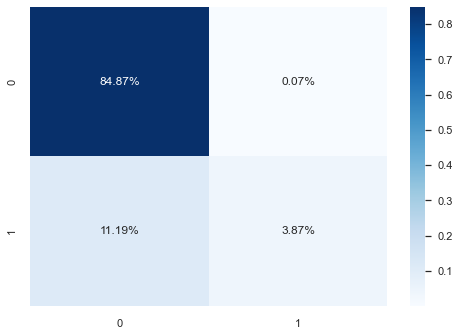

In [138]:
cm = confusion_matrix(y_train, y_train_pred_xgb)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [139]:
print(classification_report(y_test, y_test_pred_xgb, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12557
           1       0.35      0.04      0.07      2287

    accuracy                           0.84     14844
   macro avg       0.60      0.51      0.49     14844
weighted avg       0.77      0.84      0.78     14844



<AxesSubplot:>

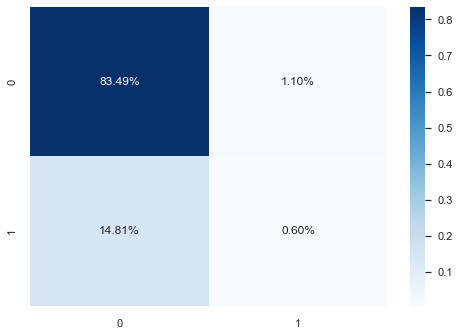

In [140]:
cm = confusion_matrix(y_test, y_test_pred_xgb)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [141]:
y_train_proba = model_xgb.predict_proba(X_train)
y_test_proba = model_xgb.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.679390880079187

## Try  to use automodeling


In [142]:
def create_models(seed = 42):
    # seed is to fix the random state
    #build several models
    models = []
    models.append(('Dummy_Classifier',DummyClassifier(random_state=seed, strategy = 'most_frequent')))
    models.append(('K_Nearest_Neighbors', KNeighborsClassifier()))
    models.append(('Support_Vector_Machines', SVC(random_state = seed)))
    models.append(('Logistic_Regression', LogisticRegression(random_state = seed)))
    models.append(('Decision_Tree', DecisionTreeClassifier(random_state = seed)))
    models.append(('Random_Forest', RandomForestClassifier(random_state = seed)))
    models.append(('AdaBoost_Classifier', AdaBoostClassifier(random_state = seed)))
    models.append(('Gradient_Boosting', GradientBoostingClassifier(random_state = seed)))
    models.append(('LGBM_Classifier', LGBMClassifier(random_state = seed)))
    models.append(('XGBoost_Classifier', XGBClassifier(random_state = seed)))
    models.append(('Naive_Bayes_GaussianNB', GaussianNB()))
    models.append(('Naive_Bayes_ComplementNB', ComplementNB()))
    
    return models

In [143]:
models = create_models()
results_accuracy = []
results_precision = []
results_recall = []
results_f1 = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    if name == 'Artificial_Neural_Network':
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=500, batch_size=50)
        # make predictions with the testing data
        predictions = np.round(model.predict(X_test)).astype(int)
        # calculate accuracy 
        accuracy = accuracy_score(y_test, predictions)
        # append the model name and the accuracy to the lists
        results.append(accuracy)
        names.append(name)
        # print classifier accuracy
        print(model.summary())
        print('Classifier: {}, Accuracy: {})'.format(name, accuracy))
    else: 
        model = model.fit(X_train, y_train)
        # make predictions with the testing data
        predictions = model.predict(X_test)
        # calculate accuracy 
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        # append the model name and the accuracy to the lists
        results_accuracy.append(accuracy)
        results_precision.append(precision)
        results_recall.append(recall)
        results_f1.append(f1)
        names.append(name)
        # print classifier accuracy
        print('Classifier: {}, Accuracy: {})'.format(name, accuracy))
results = pd.DataFrame({'Model_Name' : names, 'Accuracy' : results_accuracy, 'Precision' : results_precision, 'Recall' : results_recall, 'f1' : results_f1})
display(results)

Classifier: Dummy_Classifier, Accuracy: 0.8459310158986796)
Classifier: K_Nearest_Neighbors, Accuracy: 0.8242387496631636)
Classifier: Support_Vector_Machines, Accuracy: 0.845863648612234)
Classifier: Logistic_Regression, Accuracy: 0.8459983831851253)
Classifier: Decision_Tree, Accuracy: 0.7510105092966856)
Classifier: Random_Forest, Accuracy: 0.846065750471571)
Classifier: AdaBoost_Classifier, Accuracy: 0.8463352196173538)
Classifier: Gradient_Boosting, Accuracy: 0.8457289140393425)
Classifier: LGBM_Classifier, Accuracy: 0.8457289140393425)
Classifier: XGBoost_Classifier, Accuracy: 0.8408784694152519)
Classifier: Naive_Bayes_GaussianNB, Accuracy: 0.8208030180544328)
Classifier: Naive_Bayes_ComplementNB, Accuracy: 0.47150363783346805)


,Model_Name,Accuracy,Precision,Recall,f1
0,Dummy_Classifier,0.845931,0.000000,0.000000,0.000000
1,K_Nearest_Neighbors,0.824239,0.176707,0.038478,0.063196
2,Support_Vector_Machines,0.845864,0.000000,0.000000,0.000000
3,Logistic_Regression,0.845998,0.666667,0.000875,0.001747
4,Decision_Tree,0.751011,0.220990,0.243988,0.231920
5,Random_Forest,0.846066,0.520000,0.011369,0.022251
6,AdaBoost_Classifier,0.846335,0.541667,0.017053,0.033065
7,Gradient_Boosting,0.845729,0.466667,0.009182,0.018010
8,LGBM_Classifier,0.845729,0.484536,0.020551,0.039430
9,XGBoost_Classifier,0.840878,0.351779,0.038916,0.070079


## LGBM classifier

In [144]:
steps = [('rescale', MinMaxScaler()),
         ('lgbm',  LGBMClassifier(random_state=42, class_weight='balanced'))]

model_lgbm = Pipeline(steps)

In [145]:
model_lgbm = model_lgbm.fit(X_train,y_train)

In [146]:
y_train_pred_lgbm = model_lgbm.predict(X_train)
y_test_pred_lgbm = model_lgbm.predict(X_test)

In [147]:
accuracy_score(y_train, y_train_pred_lgbm)
accuracy_score(y_test, y_test_pred_lgbm)

0.6663298302344381

In [148]:
print(classification_report(y_train, y_train_pred_lgbm, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     29418
           1       0.33      0.80      0.47      5217

    accuracy                           0.72     34635
   macro avg       0.64      0.76      0.64     34635
weighted avg       0.86      0.72      0.76     34635



In [149]:
print(classification_report(y_test, y_test_pred_lgbm, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77     12557
           1       0.25      0.60      0.36      2287

    accuracy                           0.67     14844
   macro avg       0.58      0.64      0.57     14844
weighted avg       0.80      0.67      0.71     14844



<AxesSubplot:>

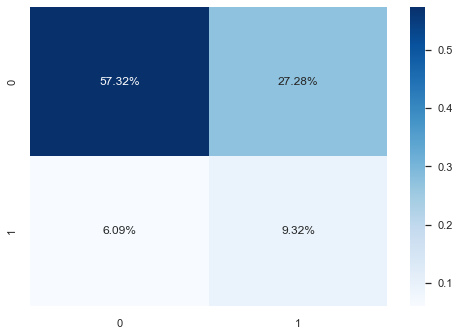

In [150]:
cm = confusion_matrix(y_test, y_test_pred_lgbm)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [151]:
y_train_proba = model_lgbm.predict_proba(X_train)
y_test_proba = model_lgbm.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.6921015943423916

In [152]:
mportance = model_lgbm.steps[1][1].feature_importances_
sorted_indices= np.argsort(importance)[::-1]
features = X_train.columns[:]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f+1, 30,
                            features[sorted_indices[f]],
                            importance[sorted_indices[f]]))

 1) rat_deb_inc                    0.064748
 2) rate                           0.055385
 3) rat_revo                       0.051883
 4) payment                        0.051062
 5) avgBal                         0.049978
 6) totalBal                       0.048728
 7) DTI                            0.048563
 8) totalBcLim                     0.048401
 9) totalRevLim                    0.047801
10) income                         0.047075
11) bcOpen                         0.046998
12) bcRatio                        0.046572
13) totalRevBal                    0.045809
14) totalIlLim                     0.041955
15) totalAcc                       0.040810
16) revolRatio                     0.040628
17) accOpen24                      0.038964
18) grade                          0.034283
19) openAcc                        0.032685
20) length                         0.025404
21) inq6mth                        0.016087
22) reason                         0.015131
23) verified                    

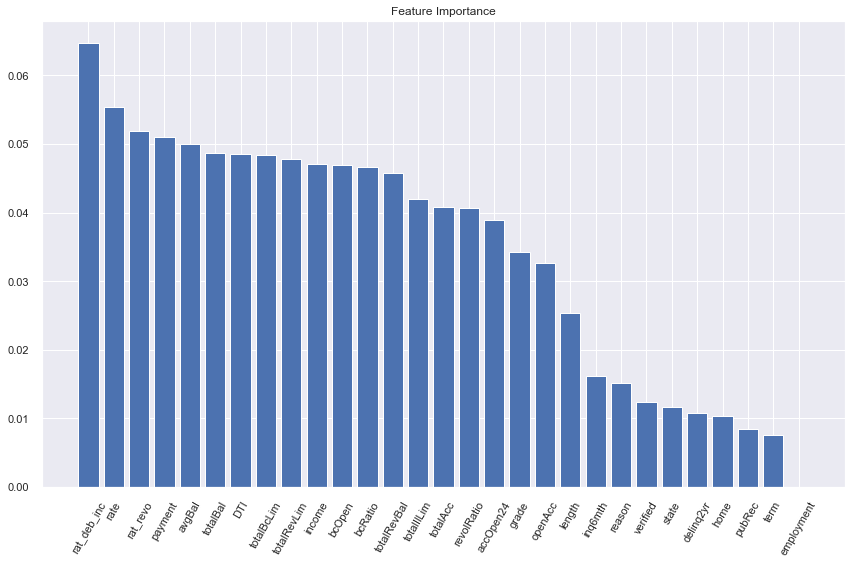

In [153]:
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importance [sorted_indices], align='center') 
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation = 60)

plt.tight_layout()

## Naive_Bayes_GaussianNB

In [154]:
steps = [('rescale', MinMaxScaler()),
         ('nbg',  GaussianNB())]

model_nbg = Pipeline(steps)

In [155]:
model_nbg = model_nbg.fit(X_train,y_train)

In [156]:
y_train_pred_nbg = model_nbg.predict(X_train)
y_test_pred_nbg = model_nbg.predict(X_test)

In [157]:
accuracy_score(y_train, y_train_pred_nbg)
accuracy_score(y_test, y_test_pred_nbg)

0.24434114793856104

In [158]:
print(classification_report(y_train, y_train_pred_nbg, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.11      0.20     29418
           1       0.16      0.96      0.27      5217

    accuracy                           0.24     34635
   macro avg       0.55      0.53      0.24     34635
weighted avg       0.82      0.24      0.21     34635



In [159]:
print(classification_report(y_test, y_test_pred_nbg, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.11      0.20     12557
           1       0.16      0.96      0.28      2287

    accuracy                           0.24     14844
   macro avg       0.55      0.54      0.24     14844
weighted avg       0.82      0.24      0.22     14844



<AxesSubplot:>

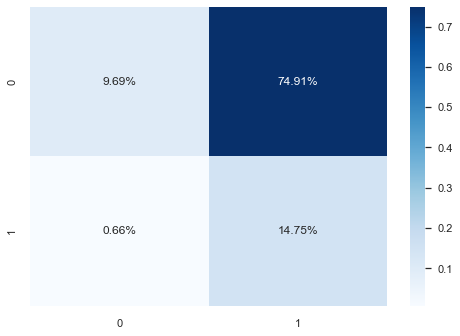

In [160]:
cm = confusion_matrix(y_test, y_test_pred_nbg)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [161]:
y_train_proba = model_nbg.predict_proba(X_train)
y_test_proba = model_nbg.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.6767494053090796

### Try oversample and undersample method

#### oversample

In [162]:
steps = [('rescale', MinMaxScaler()),
         ('nbg',  GaussianNB())]

model_nbg = Pipeline(steps)

In [163]:
model_nbgo = model_nbg.fit(X_train_o,y_train_o)

In [164]:
y_train_pred_nbgo = model_nbgo.predict(X_train_o)
accuracy_score(y_train_o, y_train_pred_nbgo)

0.3973304326149523

In [165]:
y_test_pred_nbgo = model_nbgo.predict(X_test)
accuracy_score(y_test, y_test_pred_nbgo)

0.24461061708434384

In [166]:
print(classification_report(y_train_o, y_train_pred_nbgo, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.86      0.11      0.20     29418
           1       0.35      0.96      0.52     14709

    accuracy                           0.40     44127
   macro avg       0.61      0.54      0.36     44127
weighted avg       0.69      0.40      0.31     44127



In [167]:
print(classification_report(y_test, y_test_pred_nbgo, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.93      0.12      0.21     12557
           1       0.16      0.95      0.28      2287

    accuracy                           0.24     14844
   macro avg       0.55      0.53      0.24     14844
weighted avg       0.81      0.24      0.22     14844



<AxesSubplot:>

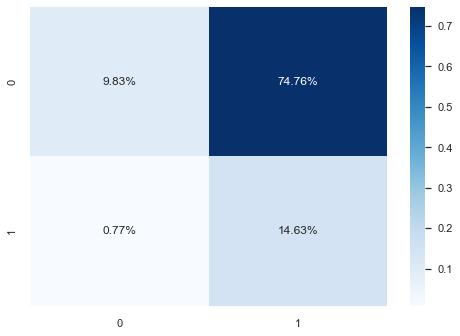

In [168]:
cm = confusion_matrix(y_test, y_test_pred_nbgo)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [169]:
y_train_proba = model_nbgo.predict_proba(X_train_o)
y_test_proba = model_nbgo.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.6662183103552393

#### Undersample

In [170]:
model_nbgu = model_nbg.fit(X_train_u,y_train_u)

In [171]:
y_train_pred_nbgu = model_nbgu.predict(X_train_u)

In [172]:
y_test_pred_nbgu = model_nbgu.predict(X_test)

In [173]:
print(classification_report(y_train_u, y_train_pred_nbgu, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.08      0.14     10434
           1       0.34      0.97      0.51      5217

    accuracy                           0.37     15651
   macro avg       0.59      0.52      0.32     15651
weighted avg       0.67      0.37      0.26     15651



In [174]:
print(classification_report(y_test, y_test_pred_nbgu, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.93      0.08      0.14     12557
           1       0.16      0.97      0.27      2287

    accuracy                           0.21     14844
   macro avg       0.54      0.52      0.21     14844
weighted avg       0.81      0.21      0.16     14844



<AxesSubplot:>

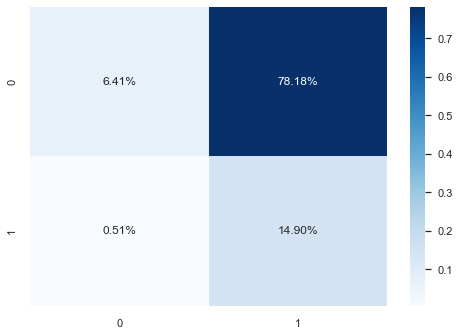

In [175]:
cm = confusion_matrix(y_test, y_test_pred_nbgu)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [176]:
y_train_proba = model_nbgu.predict_proba(X_train_u)
y_test_proba = model_nbgu.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.675489509855174

## DecisionTreeClassifier

In [177]:
steps = [('rescale', MinMaxScaler()),
         ('dt',  DecisionTreeClassifier(random_state=42,max_depth=50))]

model_dt = Pipeline(steps)

In [178]:
model_dt = model_dt.fit(X_train,y_train)

In [179]:
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)

In [180]:
accuracy_score(y_train, y_train_pred_dt)
accuracy_score(y_test, y_test_pred_dt)

0.7506063055780113

In [181]:
print(classification_report(y_train, y_train_pred_dt, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29418
           1       1.00      1.00      1.00      5217

    accuracy                           1.00     34635
   macro avg       1.00      1.00      1.00     34635
weighted avg       1.00      1.00      1.00     34635



In [182]:
print(classification_report(y_test, y_test_pred_dt, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     12557
           1       0.22      0.24      0.23      2287

    accuracy                           0.75     14844
   macro avg       0.54      0.54      0.54     14844
weighted avg       0.76      0.75      0.76     14844



<AxesSubplot:>

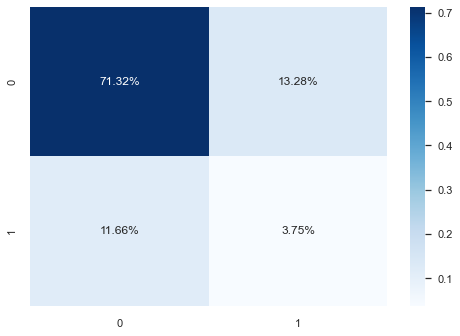

In [183]:
cm = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [184]:
y_train_proba = model_dt.predict_proba(X_train)
y_test_proba = model_dt.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.5430745028729335

### try oversample and undersample method

#### overample

In [185]:
model_dto = model_dt.fit(X_train_o,y_train_o)

In [186]:
y_train_pred_dto = model_dto.predict(X_train_o)


In [187]:
y_test_pred_dto = model_dto.predict(X_test)

In [188]:
print(classification_report(y_train_o, y_train_pred_dto, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29418
           1       1.00      1.00      1.00     14709

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127



In [189]:
print(classification_report(y_test, y_test_pred_dto, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     12557
           1       0.21      0.23      0.22      2287

    accuracy                           0.75     14844
   macro avg       0.53      0.54      0.54     14844
weighted avg       0.76      0.75      0.75     14844



<AxesSubplot:>

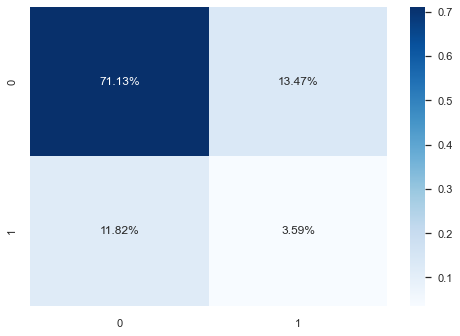

In [190]:
cm = confusion_matrix(y_test, y_test_pred_dto)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [191]:
y_train_proba = model_dto.predict_proba(X_train_o)
y_test_proba = model_dto.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.5369311653769177

#### undersample

In [192]:
model_dtu = model_dt.fit(X_train_u,y_train_u)

In [193]:
y_train_pred_dtu = model_dtu.predict(X_train_u)

In [194]:
y_test_pred_dtu = model_dtu.predict(X_test)

In [195]:
print(classification_report(y_train_u, y_train_pred_dtu, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10434
           1       1.00      1.00      1.00      5217

    accuracy                           1.00     15651
   macro avg       1.00      1.00      1.00     15651
weighted avg       1.00      1.00      1.00     15651



In [196]:
print(classification_report(y_test, y_test_pred_dtu, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77     12557
           1       0.19      0.42      0.27      2287

    accuracy                           0.65     14844
   macro avg       0.53      0.55      0.52     14844
weighted avg       0.76      0.65      0.69     14844



<AxesSubplot:>

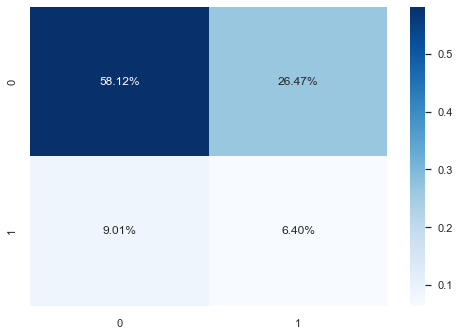

In [197]:
cm = confusion_matrix(y_test, y_test_pred_dtu)
sns.heatmap(cm/np.sum(cm), annot = True, fmt='0.2%', cmap = 'Blues')

In [198]:
y_train_proba = model_dtu.predict_proba(X_train_u)
y_test_proba = model_dtu.predict_proba(X_test)

roc_auc_score(y_test, y_test_proba[:, 1])

0.5512490676968642

### Summary:
#### 1. Above all the models, Logistic Regression with weight balanced methond has best ROC-AUC.
#### 2. Bank will select 